In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
print("Import seluruh library berhasil!")

Import seluruh library berhasil!


### Membaca Data

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/aitf/6_Data_Analyst/amazon.csv")
print(df.head())

   product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             ₹399   
1  Computers&Accessories|Accessories&Peripherals|...             ₹199   
2  Computers&Accessories|Accessories&Peripherals|...             ₹199   
3  Computers&Accessories|Accessories&Peripherals|...             ₹329   
4  Computers&Accessories|Accessories&Peripherals|...             ₹154   

  actual_price discount_percentage rating rating_count  \
0       ₹1,099                 64%    4.2       24,269   
1         ₹349                 43%  

### Data Exploration

In [ ]:
# Informasi Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

Terdapat 7668 data dengan 15 kolom. Seluruh tipe data adalah object meskipun seharusnya ada beberpa kolom yang diubah menjadi tipe data numerik.

In [ ]:
print("\nJumlah Nilai Unik Setiap Kolom:")
for column in df.columns:
  print(f"{column}: {df[column].nunique()}")


Jumlah Nilai Unik Setiap Kolom:
product_id: 1351
product_name: 1337
category: 211
discounted_price: 550
actual_price: 449
discount_percentage: 92
rating: 28
rating_count: 1143
about_product: 1293
user_id: 1194
user_name: 1194
review_id: 1194
review_title: 1194
review_content: 1212
img_link: 1412
product_link: 1465


### Konversi Kolom Harga dan Diskon ke Numerik

In [ ]:
df_converted = df.copy()

# Corrected line: df_object should be a list of column names, not an attempt to call .columns
df_object = ['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']

df_converted['discounted_price'] = df_converted['discounted_price'].astype(str).str.replace('₹', '', regex=False).str.replace(',', '', regex=False).astype(float)
df_converted['actual_price'] = df_converted['actual_price'].astype(str).str.replace('₹', '', regex=False).str.replace(',', '', regex=False).astype(float)
df_converted['discount_percentage'] = df_converted['discount_percentage'].astype(str).str.replace('%', '', regex=False).astype(float)

print("Kolom 'discounted_price', 'actual_price', dan 'discount_percentage' berhasil dikonversi ke numerik.")

df_converted['rating'] = pd.to_numeric(df_converted['rating'], errors='coerce')
df_converted['rating_count'] = df_converted['rating_count'].astype(str).str.replace(',', '', regex=False).astype(float)
print("Kolom 'rating' dan 'rating_count' berhasil dikonversi ke numerik.")

for i in df_object:
    print(f"\nKolom {i} hasil konversi:")
    print(df_converted[i].head())

Kolom 'discounted_price', 'actual_price', dan 'discount_percentage' berhasil dikonversi ke numerik.
Kolom 'rating' dan 'rating_count' berhasil dikonversi ke numerik.

Kolom discounted_price hasil konversi:
0    399.0
1    199.0
2    199.0
3    329.0
4    154.0
Name: discounted_price, dtype: float64

Kolom actual_price hasil konversi:
0    1099.0
1     349.0
2    1899.0
3     699.0
4     399.0
Name: actual_price, dtype: float64

Kolom discount_percentage hasil konversi:
0    64.0
1    43.0
2    90.0
3    53.0
4    61.0
Name: discount_percentage, dtype: float64

Kolom rating hasil konversi:
0    4.2
1    4.0
2    3.9
3    4.2
4    4.2
Name: rating, dtype: float64

Kolom rating_count hasil konversi:
0    24269.0
1    43994.0
2     7928.0
3    94363.0
4    16905.0
Name: rating_count, dtype: float64


### Deteksi Outlier

Jumlah Outlier per Kolom Numerik (Metode IQR):


,Column,Outlier Count
0,discounted_price,217
1,actual_price,213
4,rating_count,141
3,rating,74
2,discount_percentage,0


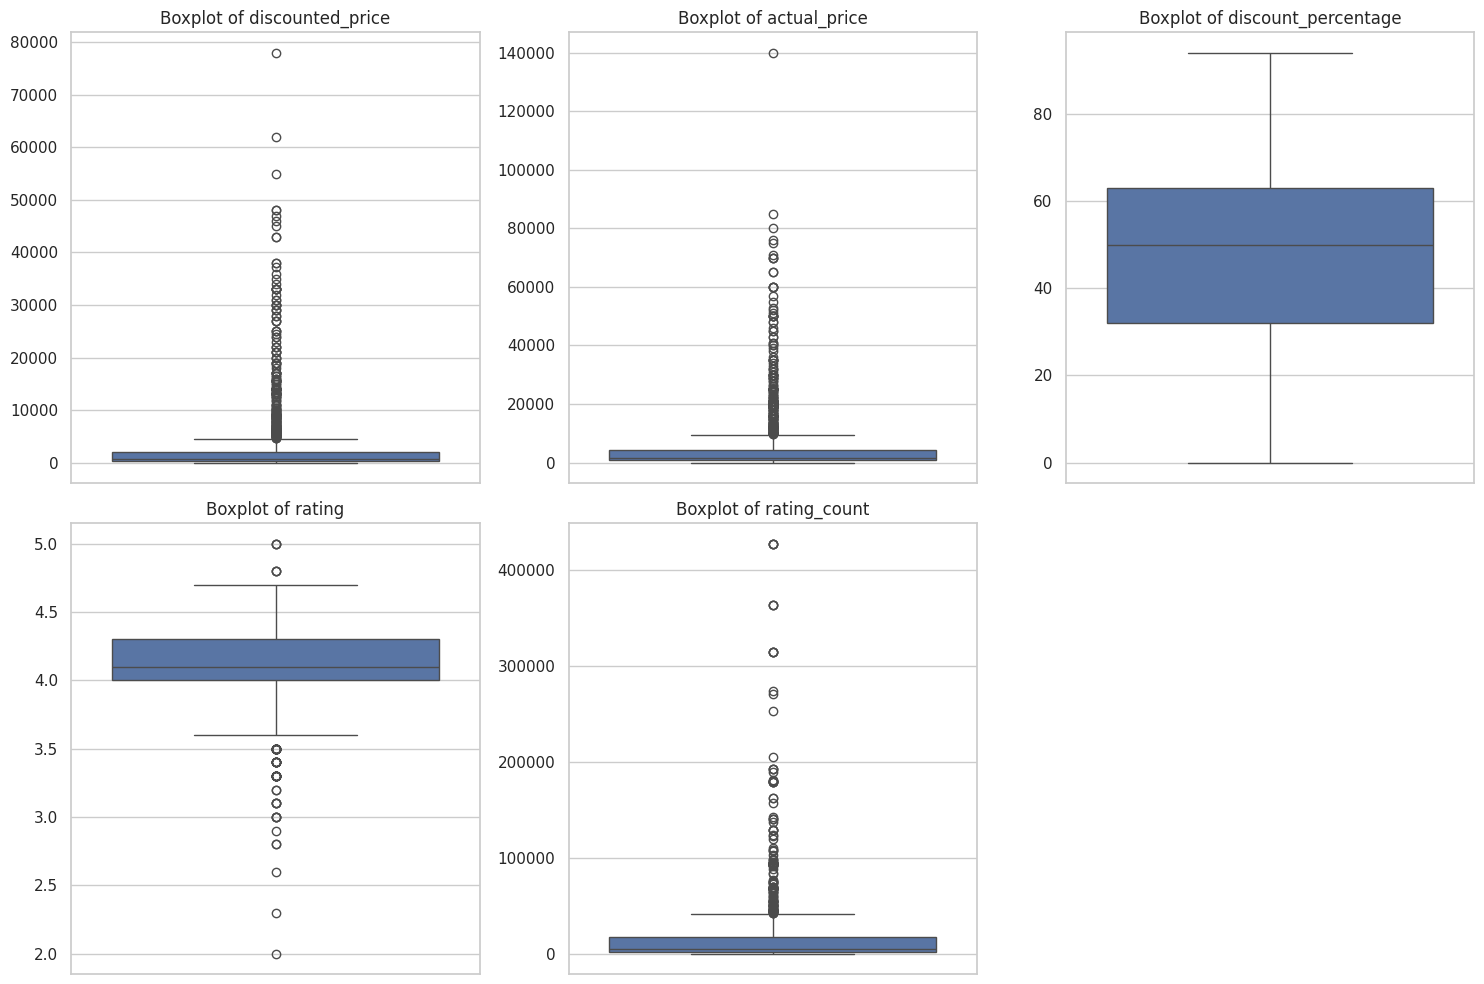

In [ ]:
numeric_cols = df_converted.select_dtypes(include=['int64', 'float64']).columns
outlier_counts = {}

for col in numeric_cols:
    Q1 = df_converted[col].quantile(0.25)
    Q3 = df_converted[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_converted[(df_converted[col] < lower_bound) | (df_converted[col] > upper_bound)]
    outlier_counts[col] = len(outliers)

outlier_df = pd.DataFrame(outlier_counts.items(), columns=['Column', 'Outlier Count'])


print("Jumlah Outlier per Kolom Numerik (Metode IQR):")
display(outlier_df.sort_values(by='Outlier Count', ascending=False))

# Visualisasi
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i + 1)  # Adjust subplot grid as needed
    sns.boxplot(y=df_converted[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel('') # Remove y-label to avoid clutter
plt.tight_layout()
plt.show()

### Identifikasi Missing Values

In [ ]:
# Identifikasi nilai yang hilang
print("\nJumlah nilai yang hilang:")
print(df_converted.isnull().sum())


Jumlah nilai yang hilang:
product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 1
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64


Missing values terdapat pada kolom rating dan rating_count.

In [ ]:
print(df_converted.isnull().rating.sum())
print(df_converted.isnull().rating_count.sum())

1
2


In [ ]:
# Show rows with any missing values
rows_with_missing_values_0 = df[df.isnull().any(axis=1)]
print("Rows with missing values:")
display(rows_with_missing_values_0)
print("\nRows with missing values df_converted:")
rows_with_missing_values_1 = df_converted[df_converted.isnull().any(axis=1)]
display(rows_with_missing_values_1)

Rows with missing values:


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
282,B0B94JPY2N,Amazon Brand - Solimo 65W Fast Charging Braide...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,80%,3.0,NaN,USB C to C Cable: This cable has type C connec...,AE7CFHY23VAJT2FI4NZKKP6GS2UQ,Pranav,RUB7U91HVZ30,The cable works but is not 65W as advertised,I have a pd supported car charger and I bought...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Amazon-Brand-Charging-Su...
324,B0BQRJ3C47,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",Computers&Accessories|Accessories&Peripherals|...,₹249,₹999,75%,5.0,NaN,💎[The Fastest Charge] - This iPhone USB C cabl...,AGJC5O5H5BBXWUV7WRIEIOOR3TVQ,Abdul Gafur,RQXD5SAMMPC6L,Awesome Product,Quick delivery.Awesome ProductPacking was good...,https://m.media-amazon.com/images/I/31-q0xhaTA...,https://www.amazon.in/REDTECH-Lightning-Certif...



Rows with missing values df_converted:


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
282,B0B94JPY2N,Amazon Brand - Solimo 65W Fast Charging Braide...,Computers&Accessories|Accessories&Peripherals|...,199.0,999.0,80.0,3.0,NaN,USB C to C Cable: This cable has type C connec...,AE7CFHY23VAJT2FI4NZKKP6GS2UQ,Pranav,RUB7U91HVZ30,The cable works but is not 65W as advertised,I have a pd supported car charger and I bought...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Amazon-Brand-Charging-Su...
324,B0BQRJ3C47,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",Computers&Accessories|Accessories&Peripherals|...,249.0,999.0,75.0,5.0,NaN,💎[The Fastest Charge] - This iPhone USB C cabl...,AGJC5O5H5BBXWUV7WRIEIOOR3TVQ,Abdul Gafur,RQXD5SAMMPC6L,Awesome Product,Quick delivery.Awesome ProductPacking was good...,https://m.media-amazon.com/images/I/31-q0xhaTA...,https://www.amazon.in/REDTECH-Lightning-Certif...
1279,B08L12N5H1,Eureka Forbes car Vac 100 Watts Powerful Sucti...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",2099.0,2499.0,16.0,NaN,992.0,No Installation is provided for this product|1...,"AGTDSNT2FKVYEPDPXAA673AIS44A,AER2XFSWNN4LAUCJ5...","Divya,Dr Nefario,Deekshith,Preeti,Prasanth R,P...","R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...","Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Eureka-Forbes-Vacuum-Cle...


### Comparing Row 1279 in `df` and `df_converted`

In [ ]:
print("Row 1279 from original DataFrame (df):")
display(df.loc[[1279]])

print("\nRow 1279 from converted DataFrame (df_converted):")
display(df_converted.loc[[1279]])

Row 1279 from original DataFrame (df):


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1279,B08L12N5H1,Eureka Forbes car Vac 100 Watts Powerful Sucti...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...","₹2,099","₹2,499",16%,|,992,No Installation is provided for this product|1...,"AGTDSNT2FKVYEPDPXAA673AIS44A,AER2XFSWNN4LAUCJ5...","Divya,Dr Nefario,Deekshith,Preeti,Prasanth R,P...","R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...","Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Eureka-Forbes-Vacuum-Cle...



Row 1279 from converted DataFrame (df_converted):


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1279,B08L12N5H1,Eureka Forbes car Vac 100 Watts Powerful Sucti...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",2099.0,2499.0,16.0,NaN,992.0,No Installation is provided for this product|1...,"AGTDSNT2FKVYEPDPXAA673AIS44A,AER2XFSWNN4LAUCJ5...","Divya,Dr Nefario,Deekshith,Preeti,Prasanth R,P...","R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...","Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Eureka-Forbes-Vacuum-Cle...


### Deskripsi Statistik

In [ ]:
# Deskripsi statistik data
print("\nDeskripsi statistik:")
print(df.describe())


Deskripsi statistik:
        product_id                                       product_name  \
count         1465                                               1465   
unique        1351                                               1337   
top     B083342NKJ  Fire-Boltt Ninja Call Pro Plus 1.83" Smart Wat...   
freq             3                                                  5   

                                                 category discounted_price  \
count                                                1465             1465   
unique                                                211              550   
top     Computers&Accessories|Accessories&Peripherals|...             ₹199   
freq                                                  233               53   

       actual_price discount_percentage rating rating_count  \
count          1465                1465   1465         1463   
unique          449                  92     28         1143   
top            ₹999             

## Data Cleansing

In [ ]:
df_clean= df_converted.copy()

# Mengatasi duplikat
print("Jumlah data sebelum pembersihan duplikat:", df_converted.shape[0])
print("Jumlah duplikat sebelum pembersihan:", df_converted.duplicated().sum())

primary_key_column = ['review_id', 'product_id']

for col in primary_key_column:
    duplicate_count = df_clean[col].duplicated().sum()
    print(f"\nDuplikat primary key '{col}': {duplicate_count}")

    if duplicate_count > 0:
        df_clean.drop_duplicates(subset=col, keep='first', inplace=True)

print("\nJumlah data setelah pembersihan duplikat:", df_clean.shape[0])
print("Jumlah duplikat setelah pembersihan:", df_clean.duplicated().sum())

for col in primary_key_column:
    print(f"\nJumlah nilai unik dari kolom '{col}': {df_clean[col].nunique()}")

Jumlah data sebelum pembersihan duplikat: 1465
Jumlah duplikat sebelum pembersihan: 0

Duplikat primary key 'review_id': 271

Duplikat primary key 'product_id': 8

Jumlah data setelah pembersihan duplikat: 1186
Jumlah duplikat setelah pembersihan: 0

Jumlah nilai unik dari kolom 'review_id': 1186

Jumlah nilai unik dari kolom 'product_id': 1186


In [ ]:
# Show rows with any missing values
print(df_clean.isnull().sum())
rows_with_missing_values = df_clean[df_clean.isnull().any(axis=1)]
print("Rows with missing values:")
display(rows_with_missing_values)

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 1
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64
Rows with missing values:


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
282,B0B94JPY2N,Amazon Brand - Solimo 65W Fast Charging Braide...,Computers&Accessories|Accessories&Peripherals|...,199.0,999.0,80.0,3.0,NaN,USB C to C Cable: This cable has type C connec...,AE7CFHY23VAJT2FI4NZKKP6GS2UQ,Pranav,RUB7U91HVZ30,The cable works but is not 65W as advertised,I have a pd supported car charger and I bought...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Amazon-Brand-Charging-Su...
324,B0BQRJ3C47,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",Computers&Accessories|Accessories&Peripherals|...,249.0,999.0,75.0,5.0,NaN,💎[The Fastest Charge] - This iPhone USB C cabl...,AGJC5O5H5BBXWUV7WRIEIOOR3TVQ,Abdul Gafur,RQXD5SAMMPC6L,Awesome Product,Quick delivery.Awesome ProductPacking was good...,https://m.media-amazon.com/images/I/31-q0xhaTA...,https://www.amazon.in/REDTECH-Lightning-Certif...
1279,B08L12N5H1,Eureka Forbes car Vac 100 Watts Powerful Sucti...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",2099.0,2499.0,16.0,NaN,992.0,No Installation is provided for this product|1...,"AGTDSNT2FKVYEPDPXAA673AIS44A,AER2XFSWNN4LAUCJ5...","Divya,Dr Nefario,Deekshith,Preeti,Prasanth R,P...","R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...","Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Eureka-Forbes-Vacuum-Cle...


In [ ]:
df_clean.dropna(inplace=True)
print("\nJumlah nilai yang hilang:")
print(df_clean.isnull().sum())


Jumlah nilai yang hilang:
product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64


Jumlah Outlier per Kolom Numerik (Metode IQR):
                Column  Outlier Count
0     discounted_price              0
1         actual_price              0
2  discount_percentage              0
3               rating              0
4         rating_count              0


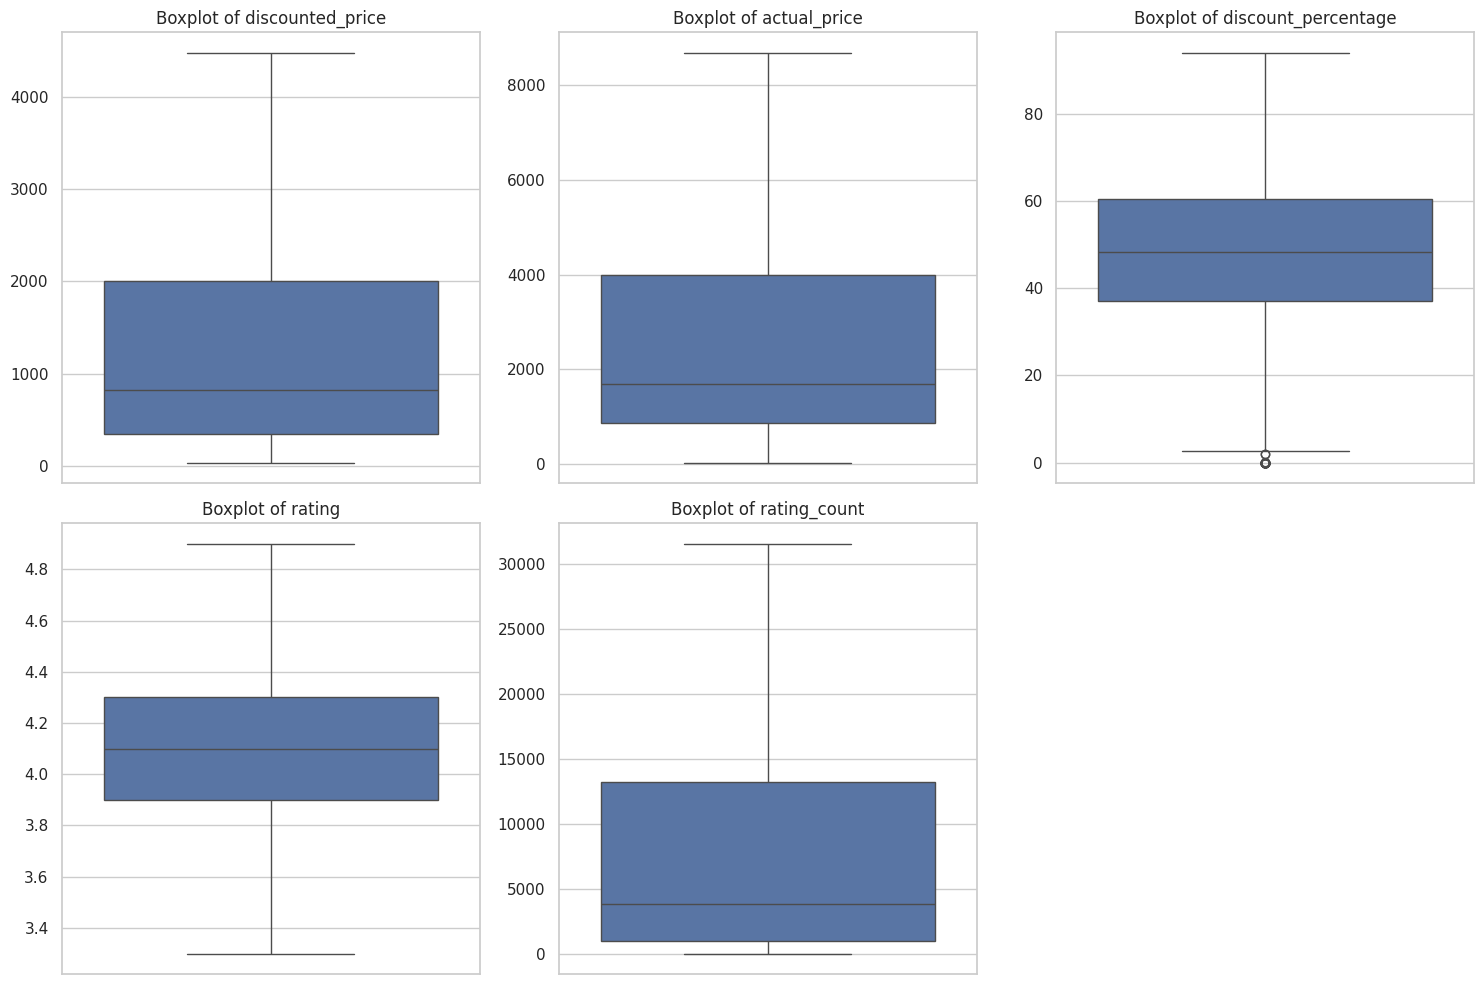

In [ ]:
df_nooutlier = df_clean.copy()

numeric_cols = df_nooutlier.select_dtypes(include=['int64', 'float64']).columns
outlier_counts = {}

for col in numeric_cols:
    Q1 = df_nooutlier[col].quantile(0.25)
    Q3 = df_nooutlier[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap outliers
    df_nooutlier[col] = df_nooutlier[col].clip(lower=lower_bound, upper=upper_bound)

    outliers = df_nooutlier[(df_nooutlier[col] < lower_bound) | (df_nooutlier[col] > upper_bound)]
    outlier_counts[col] = len(outliers)

outlier_df = pd.DataFrame(outlier_counts.items(), columns=['Column', 'Outlier Count'])

df_nooutlier['discount_percentage'] = (df_nooutlier['actual_price'] - df_nooutlier['discounted_price']) / df_nooutlier['actual_price']*100
print("Jumlah Outlier per Kolom Numerik (Metode IQR):")
print(outlier_df.sort_values(by='Outlier Count', ascending=False))

# Visualisasi
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i + 1)  # Adjust subplot grid as needed
    sns.boxplot(y=df_nooutlier[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel('') # Remove y-label to avoid clutter
plt.tight_layout()
plt.show()

In [ ]:
df_final_clean = df_nooutlier.copy()

print("Informasi Data setelah pembersihan:")
df_final_clean.info()

print("\nDescriptive statistics for numeric columns in df_final_clean (after outlier handling):")
display(df_final_clean.select_dtypes(include=['float64', 'int64']).describe())

Informasi Data setelah pembersihan:
<class 'pandas.core.frame.DataFrame'>
Index: 1183 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1183 non-null   object 
 1   product_name         1183 non-null   object 
 2   category             1183 non-null   object 
 3   discounted_price     1183 non-null   float64
 4   actual_price         1183 non-null   float64
 5   discount_percentage  1183 non-null   float64
 6   rating               1183 non-null   float64
 7   rating_count         1183 non-null   float64
 8   about_product        1183 non-null   object 
 9   user_id              1183 non-null   object 
 10  user_name            1183 non-null   object 
 11  review_id            1183 non-null   object 
 12  review_title         1183 non-null   object 
 13  review_content       1183 non-null   object 
 14  img_link             1183 non-null   object 
 15  product

,discounted_price,actual_price,discount_percentage,rating,rating_count
count,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000
mean,1441.780955,2857.778495,47.563099,4.089772,8787.666103
std,1445.317375,2772.366094,20.282560,0.286330,10418.417382
min,39.000000,39.000000,0.000000,3.300000,2.000000
25%,349.000000,868.000000,37.167769,3.900000,935.000000
50%,825.000000,1699.000000,48.414620,4.100000,3785.000000
75%,1999.000000,3990.000000,60.436549,4.300000,13182.000000
max,4474.000000,8673.000000,94.118824,4.900000,31552.500000


In [ ]:
df_final_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1183 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1183 non-null   object 
 1   product_name         1183 non-null   object 
 2   category             1183 non-null   object 
 3   discounted_price     1183 non-null   float64
 4   actual_price         1183 non-null   float64
 5   discount_percentage  1183 non-null   float64
 6   rating               1183 non-null   float64
 7   rating_count         1183 non-null   float64
 8   about_product        1183 non-null   object 
 9   user_id              1183 non-null   object 
 10  user_name            1183 non-null   object 
 11  review_id            1183 non-null   object 
 12  review_title         1183 non-null   object 
 13  review_content       1183 non-null   object 
 14  img_link             1183 non-null   object 
 15  product_link         1183 non-null   object

## Transformed

In [ ]:
df_transformed = df_final_clean.copy()

In [ ]:
df_transformed = df_final_clean.copy()

category_counts = df_transformed['category'].value_counts()
display(category_counts)
total_unique_categories = len(df_transformed['category'].unique())
print(f"Total unique categories: {total_unique_categories}")

,count
category,
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,108
"Electronics|HomeTheater,TV&Video|Accessories|RemoteControls",48
"Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear",47
Electronics|WearableTechnology|SmartWatches,40
"Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions",38
...,...
Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|RotiMakers,1
"Home&Kitchen|Heating,Cooling&AirQuality|Parts&Accessories|FanParts&Accessories",1
Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|StandMixers,1


Total unique categories: 210


In [ ]:
df_transformed['rooted_category'] = df_transformed['category'].apply(lambda x: x.split('|')[0])
rooted_category_counts = df_transformed['rooted_category'].value_counts()
display(rooted_category_counts)
total_unique_categories = len(df_transformed['rooted_category'].unique())
print(f"Total rooted categories: {total_unique_categories}")

,count
rooted_category,
Home&Kitchen,447
Electronics,380
Computers&Accessories,318
OfficeProducts,31
MusicalInstruments,2
HomeImprovement,2
Toys&Games,1
Car&Motorbike,1
Health&PersonalCare,1


Total rooted categories: 9


In [ ]:
C = df_transformed['rating'].mean() # Rata-rata rating
m = df_transformed['rating_count'].quantile(0.25) # Mengambil 25% voter terbawah sebagai threshold

# Fungsi Bayesian Rating
def calculate_bayesian(v, R, m, C):
    return (v / (v + m)) * R + (m / (v + m)) * C

# Terapkan rumus
df_transformed['bayesian_score'] = df_transformed.apply(lambda x: calculate_bayesian(x['rating_count'], x['rating'], m, C), axis=1)
print("New column 'bayesian_score' created.")
display(df_transformed[['rating', 'rating_count', 'bayesian_score']].describe())

New column 'bayesian_score' created.


,rating,rating_count,bayesian_score
count,1183.000000,1183.000000,1183.000000
mean,4.089772,8787.666103,4.109561
std,0.286330,10418.417382,0.190232
min,3.300000,2.000000,3.368839
25%,3.900000,935.000000,4.011465
50%,4.100000,3785.000000,4.099024
75%,4.300000,13182.000000,4.216814
max,4.900000,31552.500000,4.779559


In [ ]:
df_transformed['score_category'] = pd.qcut(df_transformed['bayesian_score'], q=3, labels=['low score', 'medium score', 'high score'])
print("New column 'score_category' created.")
display(df_transformed[['bayesian_score', 'score_category']].info())
score_category_counts = df_transformed['score_category'].value_counts()
display(score_category_counts)

New column 'score_category' created.
<class 'pandas.core.frame.DataFrame'>
Index: 1183 entries, 0 to 1464
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   bayesian_score  1183 non-null   float64 
 1   score_category  1183 non-null   category
dtypes: category(1), float64(1)
memory usage: 19.8 KB


None

,count
score_category,
low score,395
medium score,394
high score,394


In [ ]:
!pip install wordninja

import re
import nltk
import wordninja
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

df_combined_text_modeling = df_transformed.copy()

df_combined_text_modeling['combined_review'] = df_combined_text_modeling['review_title']+ ' ' + df_combined_text_modeling['review_content']
print("New column 'combined_review' created by combining 'review_title' and 'review_content'.")

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^a-z\s]", " ", text)
    # Split merged words
    tokens = []
    for word in text.split():
        tokens.extend(wordninja.split(word))
    # Remove stopwords
    tokens = [w for w in tokens if w not in stop_words]
    return " ".join(tokens)

df_combined_text_modeling['cleaned_combined_review'] = df_combined_text_modeling['combined_review'].apply(preprocess_text)
print("Combined review text cleaned and stored in 'cleaned_combined_review' column.")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


New column 'combined_review' created by combining 'review_title' and 'review_content'.
Combined review text cleaned and stored in 'cleaned_combined_review' column.


In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
df_combined_text_modeling["sentiment_score"] = df_combined_text_modeling["cleaned_combined_review"].apply(lambda x: sia.polarity_scores(x)["compound"])
print("New column 'sentiment_score' created.")

print("First 5 rows of cleaned_combined_review:")
display(df_combined_text_modeling[['cleaned_combined_review', 'sentiment_score']].head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


New column 'sentiment_score' created.
First 5 rows of cleaned_combined_review:


,cleaned_combined_review,sentiment_score
0,satisfied charging really fast value money pro...,0.9865
1,good braided cable type c device good quality ...,0.9959
2,good speed earlier versions good product worki...,0.9828
3,good product good one nice really nice product...,0.9930
4,good original decent good one secondary use be...,0.9982


In [ ]:
df_combined_text_modeling.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1183 entries, 0 to 1464
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   product_id               1183 non-null   object  
 1   product_name             1183 non-null   object  
 2   category                 1183 non-null   object  
 3   discounted_price         1183 non-null   float64 
 4   actual_price             1183 non-null   float64 
 5   discount_percentage      1183 non-null   float64 
 6   rating                   1183 non-null   float64 
 7   rating_count             1183 non-null   float64 
 8   about_product            1183 non-null   object  
 9   user_id                  1183 non-null   object  
 10  user_name                1183 non-null   object  
 11  review_id                1183 non-null   object  
 12  review_title             1183 non-null   object  
 13  review_content           1183 non-null   object  
 14  img_link     

In [ ]:
df_combined_text_modeling['sentiment_category'] = pd.qcut(df_combined_text_modeling['sentiment_score'], q=3, labels=['negative', 'neutral', 'positive'])
print("New column 'score_category' created.")
display(df_combined_text_modeling[['sentiment_score', 'sentiment_category']].head())
display(df_combined_text_modeling[['sentiment_score']].describe())

New column 'score_category' created.


,sentiment_score,sentiment_category
0,0.9865,negative
1,0.9959,positive
2,0.9828,negative
3,0.9930,neutral
4,0.9982,positive


,sentiment_score
count,1183.000000
mean,0.977436
std,0.119687
min,-0.859100
25%,0.988700
50%,0.993700
75%,0.996400
max,0.999900


In [ ]:
from sklearn.preprocessing import LabelEncoder

df_encoded=df_combined_text_modeling.copy()

# Initialize LabelEncoder for rooted_category
label_encoder_root = LabelEncoder()

# Encode the 'rooted_category' column
df_encoded['root_category_encoded'] = label_encoder_root.fit_transform(df_encoded['rooted_category'])
print("Kolom 'rooted_category' berhasil diencode ke numerik.")
print("Mapping 'rooted_category' ke numerik:")
mapping_root = dict(zip(label_encoder_root.classes_, label_encoder_root.transform(label_encoder_root.classes_)))
for key, value in mapping_root.items():
    print(f"{key}: {value}")

# Initialize LabelEncoder for score_category
label_encoder_score = LabelEncoder()

# Encode the 'score_category' column
df_encoded['score_category_encoded'] = label_encoder_score.fit_transform(df_encoded['score_category'])
print("\nKolom 'score_category' berhasil diencode ke numerik.")
print("Mapping 'score_category' ke numerik:")
mapping_score = dict(zip(label_encoder_score.classes_, label_encoder_score.transform(label_encoder_score.classes_)))
for key, value in mapping_score.items():
    print(f"{key}: {value}")

# Initialize LabelEncoder for rooted_category
label_encoder_sentiment = LabelEncoder()

# Encode the 'rooted_category' column
df_encoded['sentiment_category_encoded'] = label_encoder_root.fit_transform(df_encoded['sentiment_category'])
print("\nKolom 'sentiment_category' berhasil diencode ke numerik.")
print("Mapping 'sentiment_category' ke numerik:")
mapping_root = dict(zip(label_encoder_root.classes_, label_encoder_root.transform(label_encoder_root.classes_)))
for key, value in mapping_root.items():
    print(f"{key}: {value}")

Kolom 'rooted_category' berhasil diencode ke numerik.
Mapping 'rooted_category' ke numerik:
Car&Motorbike: 0
Computers&Accessories: 1
Electronics: 2
Health&PersonalCare: 3
Home&Kitchen: 4
HomeImprovement: 5
MusicalInstruments: 6
OfficeProducts: 7
Toys&Games: 8

Kolom 'score_category' berhasil diencode ke numerik.
Mapping 'score_category' ke numerik:
high score: 0
low score: 1
medium score: 2

Kolom 'sentiment_category' berhasil diencode ke numerik.
Mapping 'sentiment_category' ke numerik:
negative: 0
neutral: 1
positive: 2


In [ ]:
print(df_encoded.info())
print(df_encoded.shape)

<class 'pandas.core.frame.DataFrame'>
Index: 1183 entries, 0 to 1464
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   product_id                  1183 non-null   object  
 1   product_name                1183 non-null   object  
 2   category                    1183 non-null   object  
 3   discounted_price            1183 non-null   float64 
 4   actual_price                1183 non-null   float64 
 5   discount_percentage         1183 non-null   float64 
 6   rating                      1183 non-null   float64 
 7   rating_count                1183 non-null   float64 
 8   about_product               1183 non-null   object  
 9   user_id                     1183 non-null   object  
 10  user_name                   1183 non-null   object  
 11  review_id                   1183 non-null   object  
 12  review_title                1183 non-null   object  
 13  review_content         

In [ ]:
df_dropped = df_encoded.copy()

numeric_cols = df_dropped.select_dtypes(include=['number']).columns.tolist()
# Explicitly add the non-numeric columns that should be kept
columns_to_keep_explicitly = numeric_cols + ['score_category', 'rooted_category', 'cleaned_combined_review', 'sentiment_category']

# Filter the DataFrame to keep only these columns
df_dropped = df_dropped[columns_to_keep_explicitly]

print("DataFrame after dropping non-numeric columns :")
df_dropped.info()

DataFrame after dropping non-numeric columns :
<class 'pandas.core.frame.DataFrame'>
Index: 1183 entries, 0 to 1464
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   discounted_price            1183 non-null   float64 
 1   actual_price                1183 non-null   float64 
 2   discount_percentage         1183 non-null   float64 
 3   rating                      1183 non-null   float64 
 4   rating_count                1183 non-null   float64 
 5   bayesian_score              1183 non-null   float64 
 6   sentiment_score             1183 non-null   float64 
 7   root_category_encoded       1183 non-null   int64   
 8   score_category_encoded      1183 non-null   int64   
 9   sentiment_category_encoded  1183 non-null   int64   
 10  score_category              1183 non-null   category
 11  rooted_category             1183 non-null   object  
 12  cleaned_combined_review     1183 n

## Kontruksi

In [ ]:
from sklearn.preprocessing import MinMaxScaler

df_normalized = df_dropped.copy()

# Group 1: Prices (discounted_price, actual_price)
# Find global min and max across both price columns to keep their ratio relative to each other's full range
min_price = df_normalized[['discounted_price', 'actual_price']].min().min()
max_price = df_normalized[['discounted_price', 'actual_price']].max().max()

df_normalized['discounted_price'] = (df_normalized['discounted_price'] - min_price) / (max_price - min_price)
df_normalized['actual_price'] = (df_normalized['actual_price'] - min_price) / (max_price - min_price)

# Group 2: discount_percentage
# Scale independently as it's already a ratio/percentage
scaler_discount_percentage = MinMaxScaler()
df_normalized['discount_percentage'] = scaler_discount_percentage.fit_transform(df_normalized[['discount_percentage']])

# Group 3: Rating and Score (rating, rating_count, bayesian_score)
# Scale each independently due to their different magnitudes and multiplicative relationship.
# The 'ratio' preservation here implies normalizing their individual scales.
scaler_rating = MinMaxScaler()
df_normalized['rating'] = scaler_rating.fit_transform(df_normalized[['rating']])

scaler_rating_count = MinMaxScaler()
df_normalized['rating_count'] = scaler_rating_count.fit_transform(df_normalized[['rating_count']])

# Use 'bayesian_score' instead of 'total_score'
scaler_bayesian_score = MinMaxScaler()
df_normalized['bayesian_score'] = scaler_bayesian_score.fit_transform(df_normalized[['bayesian_score']])

print("Numeric columns in df_normalized have been normalized while considering relationships.")
print("\nFirst 5 rows of normalized DataFrame:")
display(df_normalized.head())
print("\nDescriptive statistics of normalized DataFrame:")
display(df_normalized.describe())

Numeric columns in df_normalized have been normalized while considering relationships.

First 5 rows of normalized DataFrame:


,discounted_price,actual_price,discount_percentage,rating,rating_count,bayesian_score,sentiment_score,root_category_encoded,score_category_encoded,sentiment_category_encoded,score_category,rooted_category,cleaned_combined_review,sentiment_category
0,0.041696,0.122770,0.676743,0.5625,0.769148,0.586276,0.9865,1,0,0,high score,Computers&Accessories,satisfied charging really fast value money pro...,negative
1,0.018531,0.035905,0.456656,0.4375,1.000000,0.449235,0.9959,1,1,2,low score,Computers&Accessories,good braided cable type c device good quality ...,positive
2,0.018531,0.215427,0.951147,0.3750,0.251216,0.390709,0.9828,1,1,0,low score,Computers&Accessories,good speed earlier versions good product worki...,negative
3,0.033588,0.076442,0.562404,0.5625,1.000000,0.586926,0.9930,1,0,1,high score,Computers&Accessories,good product good one nice really nice product...,neutral
4,0.013319,0.041696,0.652404,0.5625,0.535744,0.585080,0.9982,1,0,2,high score,Computers&Accessories,good original decent good one secondary use be...,positive



Descriptive statistics of normalized DataFrame:


,discounted_price,actual_price,discount_percentage,rating,rating_count,bayesian_score,sentiment_score,root_category_encoded,score_category_encoded,sentiment_category_encoded
count,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000
mean,0.162472,0.326474,0.505352,0.493607,0.278464,0.525067,0.977436,2.633981,1.000000,0.987320
std,0.167398,0.321099,0.215500,0.178956,0.330214,0.134847,0.119687,1.453310,0.816497,0.812763
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.859100,0.000000,0.000000,0.000000
25%,0.035905,0.096016,0.394903,0.375000,0.029572,0.455530,0.988700,1.000000,0.000000,0.000000
50%,0.091035,0.192263,0.514399,0.500000,0.119903,0.517597,0.993700,2.000000,1.000000,1.000000
75%,0.227009,0.457609,0.642130,0.625000,0.417743,0.601094,0.996400,4.000000,2.000000,2.000000
max,0.513667,1.000000,1.000000,1.000000,1.000000,1.000000,0.999900,8.000000,2.000000,2.000000


In [ ]:
df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1183 entries, 0 to 1464
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   discounted_price            1183 non-null   float64 
 1   actual_price                1183 non-null   float64 
 2   discount_percentage         1183 non-null   float64 
 3   rating                      1183 non-null   float64 
 4   rating_count                1183 non-null   float64 
 5   bayesian_score              1183 non-null   float64 
 6   sentiment_score             1183 non-null   float64 
 7   root_category_encoded       1183 non-null   int64   
 8   score_category_encoded      1183 non-null   int64   
 9   sentiment_category_encoded  1183 non-null   int64   
 10  score_category              1183 non-null   category
 11  rooted_category             1183 non-null   object  
 12  cleaned_combined_review     1183 non-null   object  
 13  sentiment_category     

In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import train_test_split

# Copy dataframe agar aman
df = df_normalized.copy()

# Feature matrix
X_score = df.drop(columns=["score_category", "rooted_category", "sentiment_category",
                 "cleaned_combined_review", "score_category_encoded",
                 "bayesian_score", "rating", "rating_count"])
X_root = df.drop(columns=["score_category", "rooted_category", "sentiment_category",
                 "cleaned_combined_review", "root_category_encoded"])
X_sentiment = df.drop(columns=["score_category", "rooted_category", "sentiment_category",
                 "cleaned_combined_review", "sentiment_category_encoded", "sentiment_score"])

# Target variables
y_score = df["score_category_encoded"]
y_root = df["root_category_encoded"]
y_sentiment = df["sentiment_category_encoded"]

# For score_category
selector_score = SelectKBest(score_func=mutual_info_classif, k='all')
selector_score.fit(X_score, y_score)

score_feature_importance = pd.DataFrame({
    "Feature": X_score.columns,
    "MI_Score": selector_score.scores_
}).sort_values(by="MI_Score", ascending=False)

# For root_category
selector_root = SelectKBest(score_func=mutual_info_classif, k='all')
selector_root.fit(X_root, y_root)

root_feature_importance = pd.DataFrame({
    "Feature": X_root.columns,
    "MI_Score": selector_root.scores_
}).sort_values(by="MI_Score", ascending=False)

# For sentiment_category
selector_sentiment = SelectKBest(score_func=mutual_info_classif, k='all')
selector_sentiment.fit(X_sentiment, y_sentiment)

sentiment_feature_importance = pd.DataFrame({
    "Feature": X_sentiment.columns,
    "MI_Score": selector_sentiment.scores_
}).sort_values(by="MI_Score", ascending=False)

top_k = 2

top_score_features = score_feature_importance.head(top_k)
top_root_features = root_feature_importance.head(top_k)
top_sentiment_features = sentiment_feature_importance.head(top_k)

print("Top features influencing score_category:")
print(top_score_features)

print("\nTop features influencing rooted_category:")
print(top_root_features)

print("\nTop features influencing sentiment_category:")
print(top_sentiment_features)

Top features influencing score_category:
            Feature  MI_Score
1      actual_price  0.076454
0  discounted_price  0.041900

Top features influencing rooted_category:
               Feature  MI_Score
2  discount_percentage  0.187597
1         actual_price  0.173909

Top features influencing sentiment_category:
        Feature  MI_Score
3        rating  0.080870
1  actual_price  0.053069


In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

# Instantiate TfidfVectorizer
tfidf_vectorizer_combined = TfidfVectorizer(
    max_features=5000,      # bisa 100–1000 tergantung RAM
    min_df=5,
    max_df=0.8
)

tfidf_matrix = tfidf_vectorizer_combined.fit_transform(df_normalized["cleaned_combined_review"])

# Define numeric features for X_score
numeric_features_for_score_names = [
    "discounted_price", "actual_price", "discount_percentage",
    "root_category_encoded", "sentiment_score"
]
numeric_features_for_score = df_normalized[numeric_features_for_score_names]

# Define numeric features for X_root
numeric_features_for_root_names = [
    "discounted_price", "actual_price", "discount_percentage",
    "rating", "rating_count", "bayesian_score", "score_category_encoded",
    "sentiment_score"
]
numeric_features_for_root = df_normalized[numeric_features_for_root_names]

# Define numeric features for X_sentiment
numeric_features_for_sentiment_names = [
    "discounted_price", "actual_price", "discount_percentage",
    "rating", "rating_count", "bayesian_score", "root_category_encoded",
    "score_category_encoded"
]
numeric_features_for_sentiment = df_normalized[numeric_features_for_sentiment_names]

# Get TF-IDF feature names
tfidf_feature_names = tfidf_vectorizer_combined.get_feature_names_out()

# Construct X_score and its feature names
X_score = hstack([numeric_features_for_score.values, tfidf_matrix])
all_score_feature_names = numeric_features_for_score_names + list(tfidf_feature_names)

# Construct X_root and its feature names
X_root = hstack([numeric_features_for_root.values, tfidf_matrix])
all_root_feature_names = numeric_features_for_root_names + list(tfidf_feature_names)

# Target variables (use df_normalized for consistency)
y_score = df_normalized["score_category_encoded"]
y_root = df_normalized["root_category_encoded"]

# For score_category
selector_score = SelectKBest(score_func=mutual_info_classif, k='all')
selector_score.fit(X_score, y_score)

score_feature_importance = pd.DataFrame({
    "Feature": all_score_feature_names, # Use the combined feature names
    "MI_Score": selector_score.scores_
}).sort_values(by="MI_Score", ascending=False)

# For root_category
selector_root = SelectKBest(score_func=mutual_info_classif, k='all')
selector_root.fit(X_root, y_root)

root_feature_importance = pd.DataFrame({
    "Feature": all_root_feature_names, # Use the combined feature names
    "MI_Score": selector_root.scores_
}).sort_values(by="MI_Score", ascending=False)

top_k = 5

top_score_features = score_feature_importance.head(top_k)
top_root_features = root_feature_importance.head(top_k)

print("Top features influencing score_category:")
print(top_score_features)

print("\nTop features influencing rooted_category:")
print(top_root_features)

Top features influencing score_category:
                  Feature  MI_Score
2     discount_percentage  0.817752
2266              quality  0.775551
1887                 nice  0.729493
3071                  use  0.668996
2187                price  0.637302

Top features influencing rooted_category:
                  Feature  MI_Score
5          bayesian_score  1.144930
4            rating_count  1.064412
2     discount_percentage  0.970315
2269              quality  0.888690
1890                 nice  0.819906


## Visualisasi

In [ ]:
df_fix=df_normalized.copy()

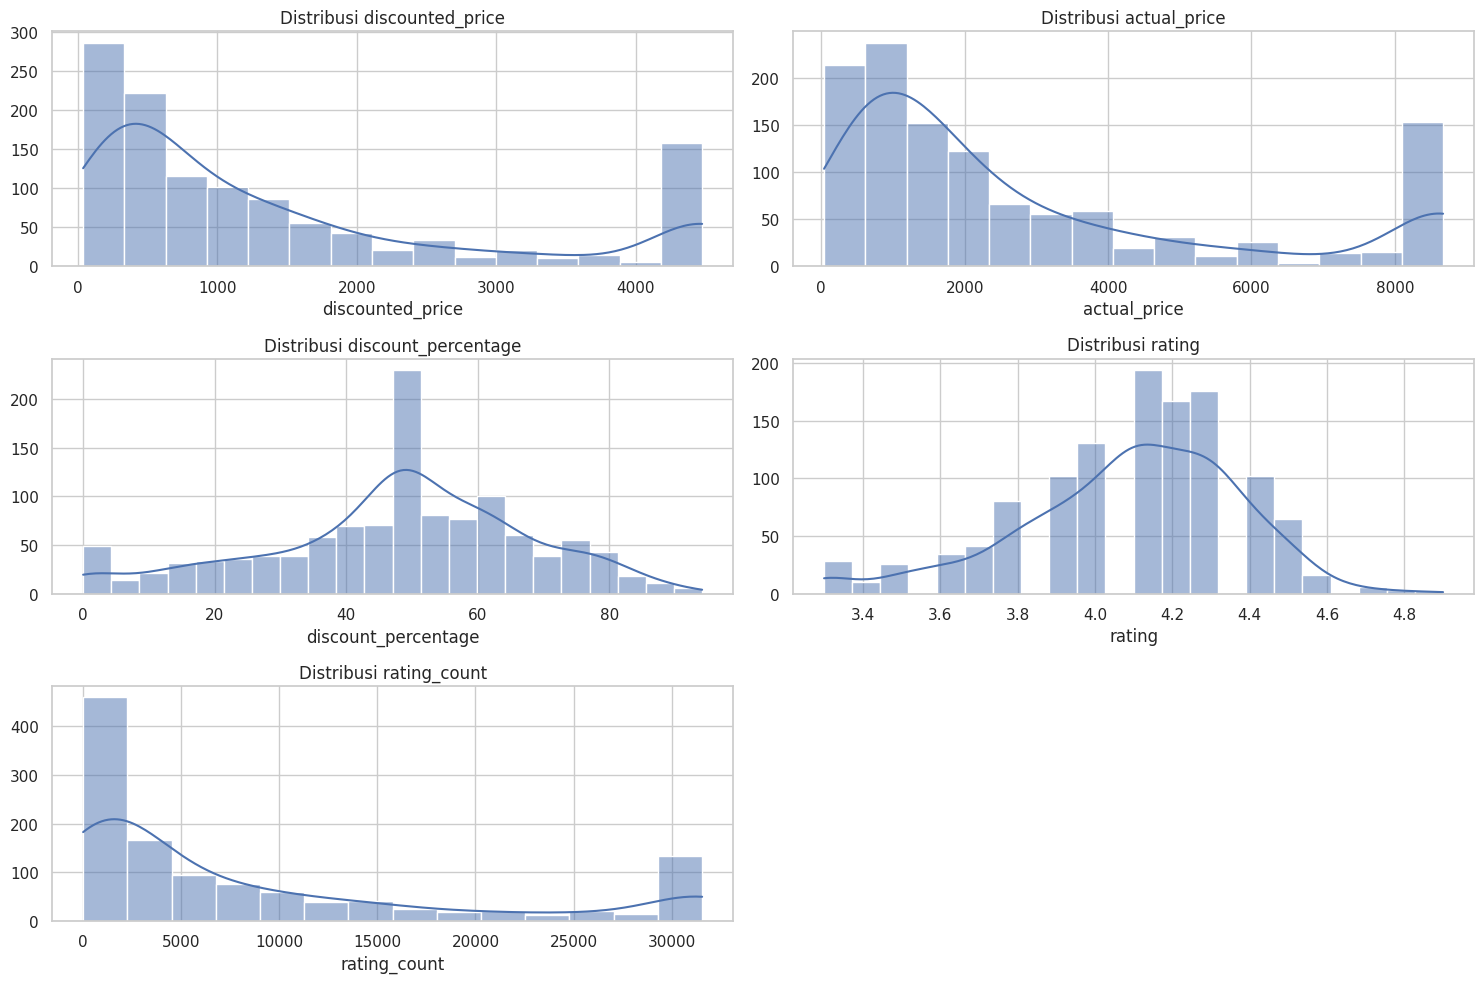

In [ ]:
# Visualisasi distribusi setelah cleansing
numeric_cols = df_final_clean.select_dtypes(include=['int64', 'float64']).columns
num_rows = (len(numeric_cols) + 1) // 2  # Calculate the number of rows needed

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(num_rows, 2, i + 1) # Use calculated rows and cols
    sns.histplot(df_final_clean[col], kde=True)
    plt.title(f'Distribusi {col}')
    plt.ylabel('') # Remove y-label to avoid clutter
plt.tight_layout()
plt.show()

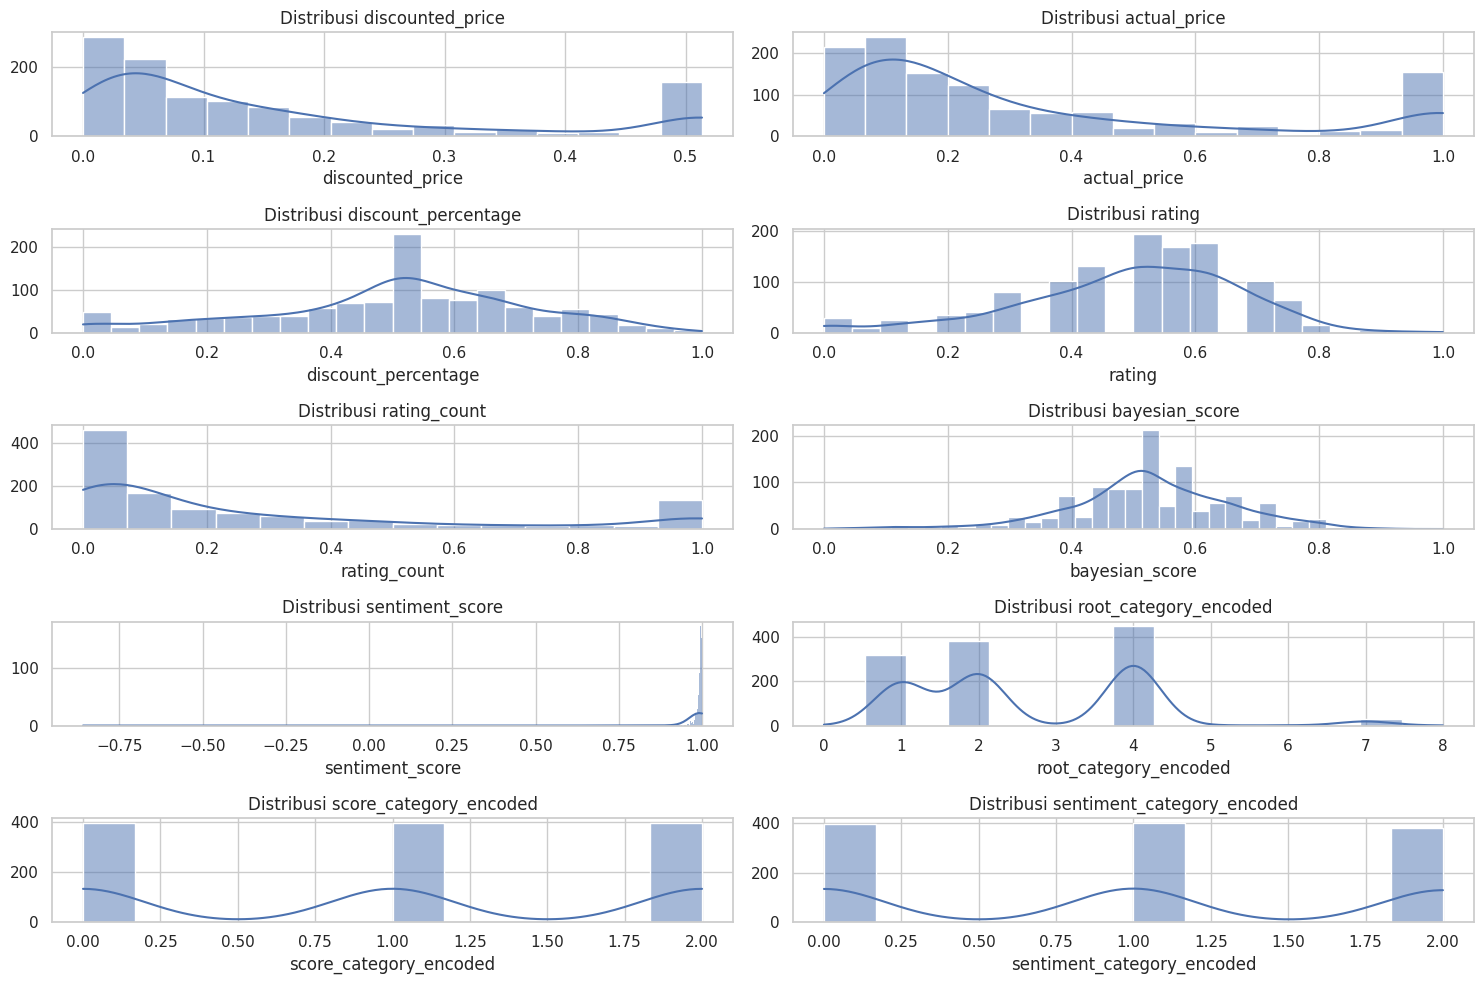

In [ ]:
numeric_cols = df_fix.select_dtypes(include=['int64', 'float64']).columns
num_rows = (len(numeric_cols) + 1) // 2  # Calculate the number of rows needed

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(num_rows, 2, i + 1) # Use calculated rows and cols
    sns.histplot(df_fix[col], kde=True)
    plt.title(f'Distribusi {col}')
    plt.ylabel('') # Remove y-label to avoid clutter
plt.tight_layout()
plt.show()

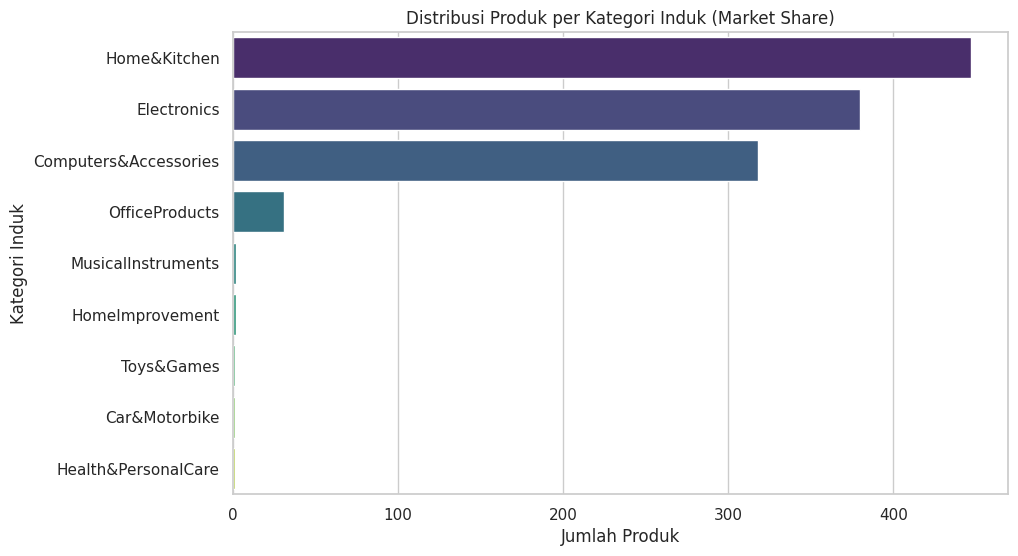

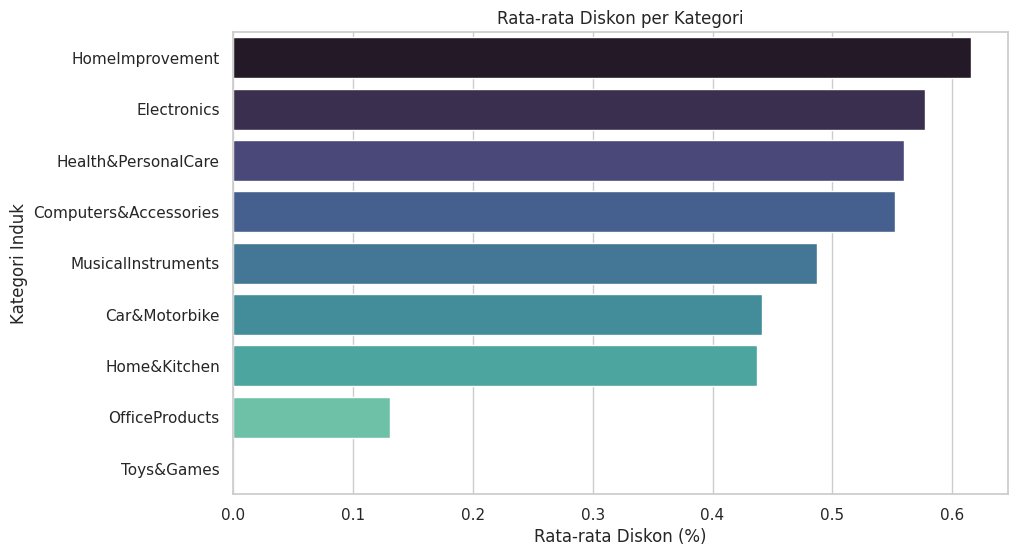

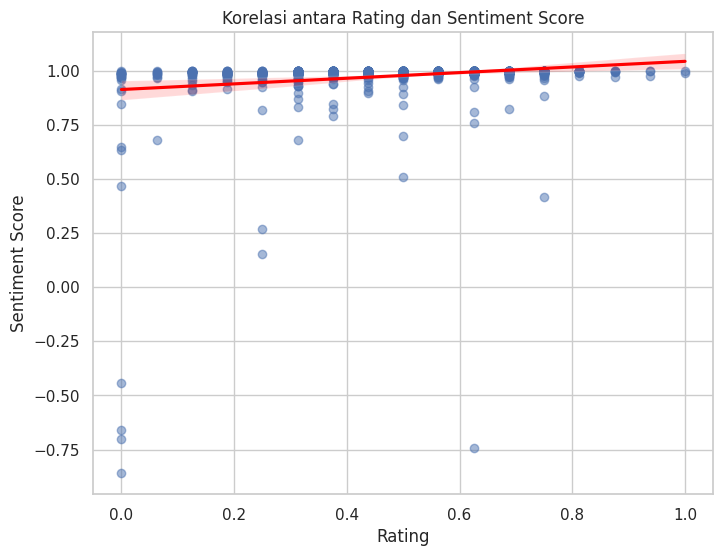

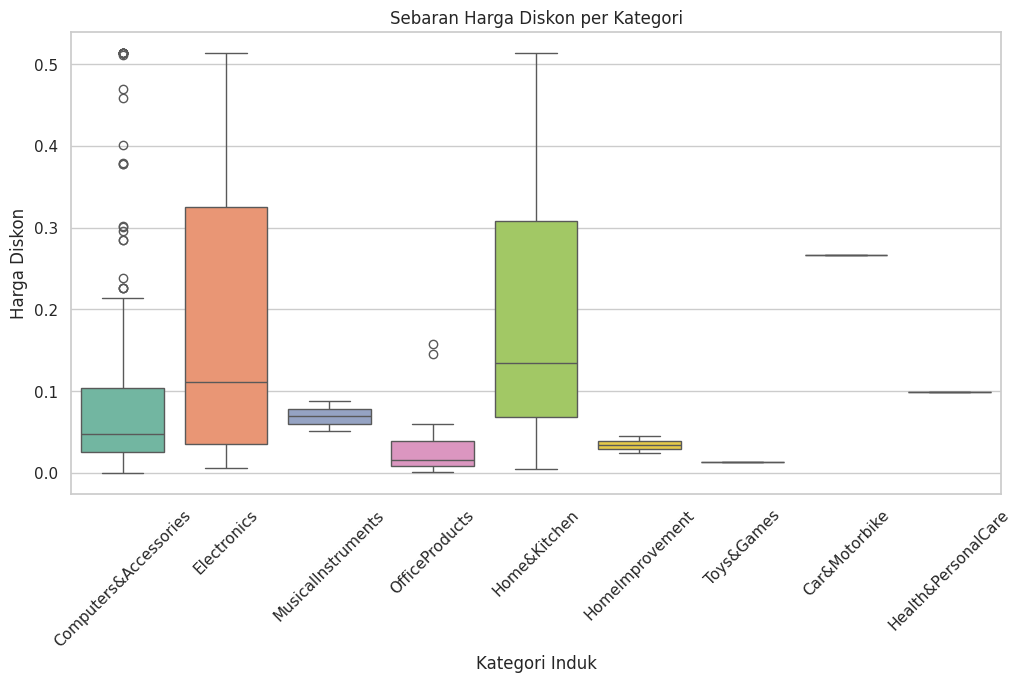

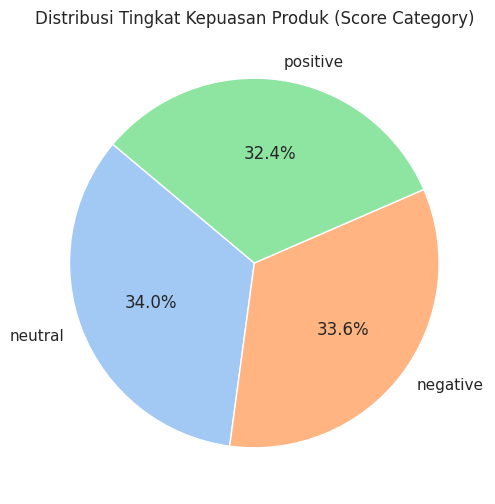

In [ ]:
# Set style
sns.set(style="whitegrid")

# 1. Distribusi Produk per Kategori Induk (Market Share)
plt.figure(figsize=(10,6))
sns.countplot(y='rooted_category',
              data=df_fix,
              order=df_fix['rooted_category'].value_counts().index,
              palette="viridis")
plt.title('Distribusi Produk per Kategori Induk (Market Share)')
plt.xlabel('Jumlah Produk')
plt.ylabel('Kategori Induk')
plt.show()

# 2. Analisis Strategi Diskon per Kategori
plt.figure(figsize=(10,6))
discount_means = df_fix.groupby('rooted_category')['discount_percentage'].mean().sort_values(ascending=False)
sns.barplot(x=discount_means.values, y=discount_means.index, palette="mako")
plt.title('Rata-rata Diskon per Kategori')
plt.xlabel('Rata-rata Diskon (%)')
plt.ylabel('Kategori Induk')
plt.show()

# 3. Korelasi antara Rating dan Sentiment Score
plt.figure(figsize=(8,6))
sns.regplot(x='rating', y='sentiment_score',
            data=df_fix,
            scatter_kws={'alpha':0.5},
            line_kws={'color':'red'})
plt.title('Korelasi antara Rating dan Sentiment Score')
plt.xlabel('Rating')
plt.ylabel('Sentiment Score')
plt.show()

# 4. Perbandingan Harga vs Kategori (Price Range)
plt.figure(figsize=(12,6))
sns.boxplot(x='rooted_category', y='discounted_price',
            data=df_fix, palette="Set2")
plt.title('Sebaran Harga Diskon per Kategori')
plt.xlabel('Kategori Induk')
plt.ylabel('Harga Diskon')
plt.xticks(rotation=45)
plt.show()

# 5. Distribusi Tingkat Kepuasan Produk (Score Category)
plt.figure(figsize=(6,6))
scores = df_fix['sentiment_category'].value_counts()
plt.pie(scores, labels=scores.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Distribusi Tingkat Kepuasan Produk (Score Category)')
plt.show()

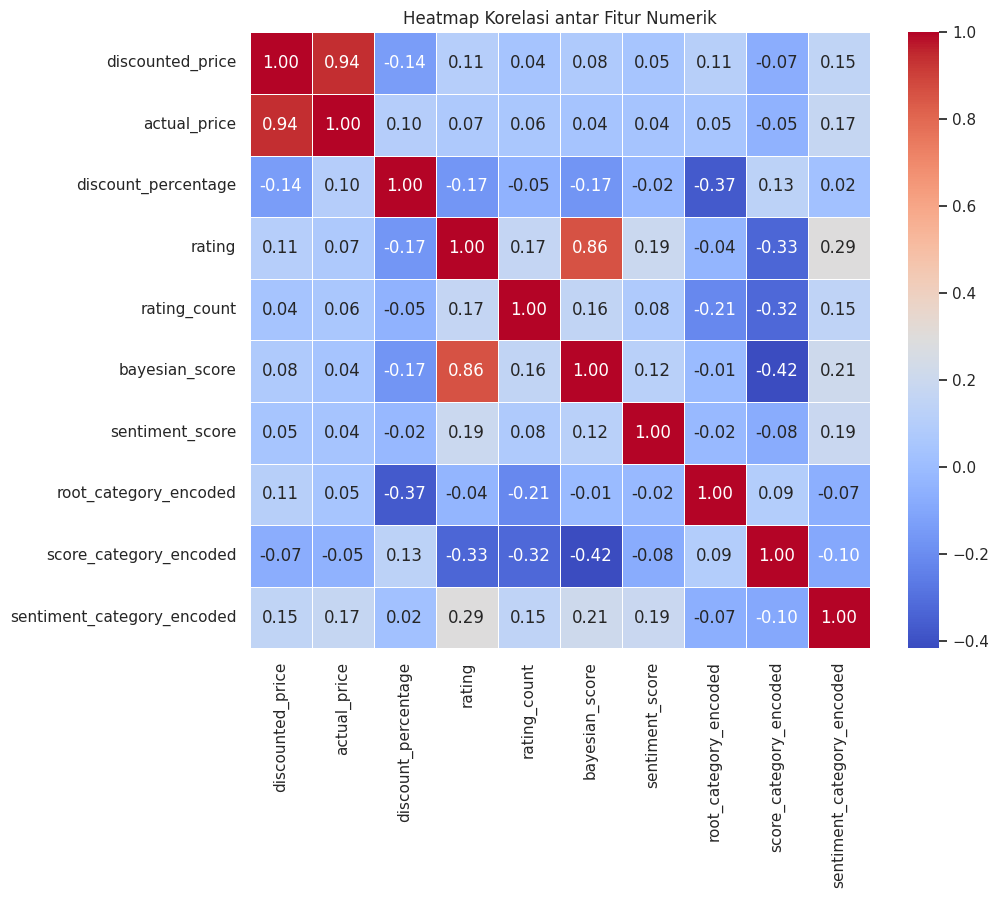

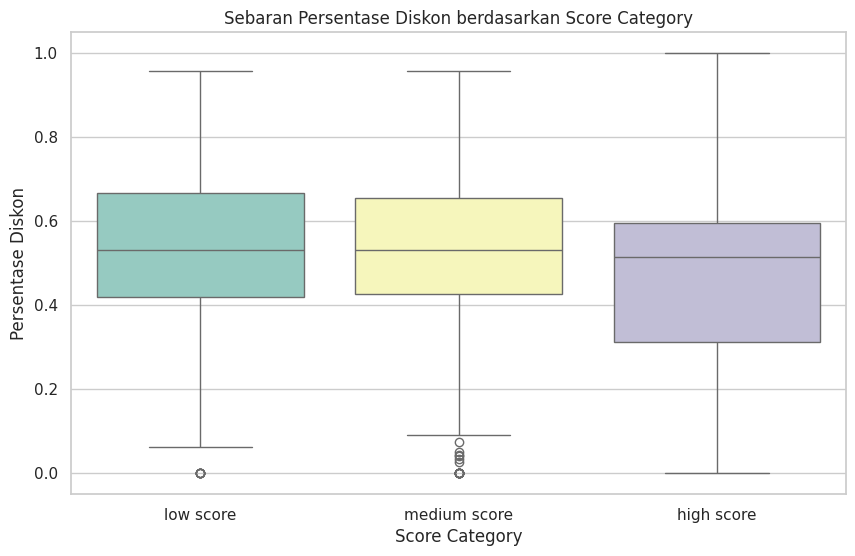

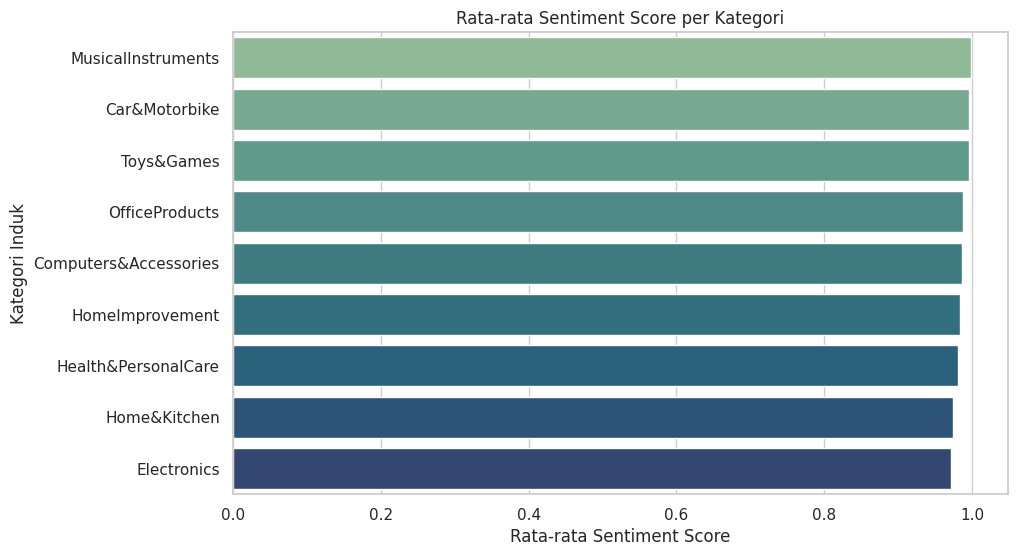

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# 1. Heatmap Korelasi antar Fitur Numerik
plt.figure(figsize=(10,8))
numeric_cols = df_fix.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df_fix[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi antar Fitur Numerik')
plt.show()

# 2. Boxplot Harga Diskon berdasarkan Score Category
plt.figure(figsize=(10,6))
sns.boxplot(x='score_category', y='discount_percentage',
            data=df_fix, palette='Set3')
plt.title('Sebaran Persentase Diskon berdasarkan Score Category')
plt.xlabel('Score Category')
plt.ylabel('Persentase Diskon')
plt.show()

# 3. Barplot Rata-rata Sentiment Score per Kategori
plt.figure(figsize=(10,6))
sentiment_means = df_fix.groupby('rooted_category')['sentiment_score'].mean().sort_values(ascending=False)
sns.barplot(x=sentiment_means.values, y=sentiment_means.index, palette='crest')
plt.title('Rata-rata Sentiment Score per Kategori')
plt.xlabel('Rata-rata Sentiment Score')
plt.ylabel('Kategori Induk')
plt.show()

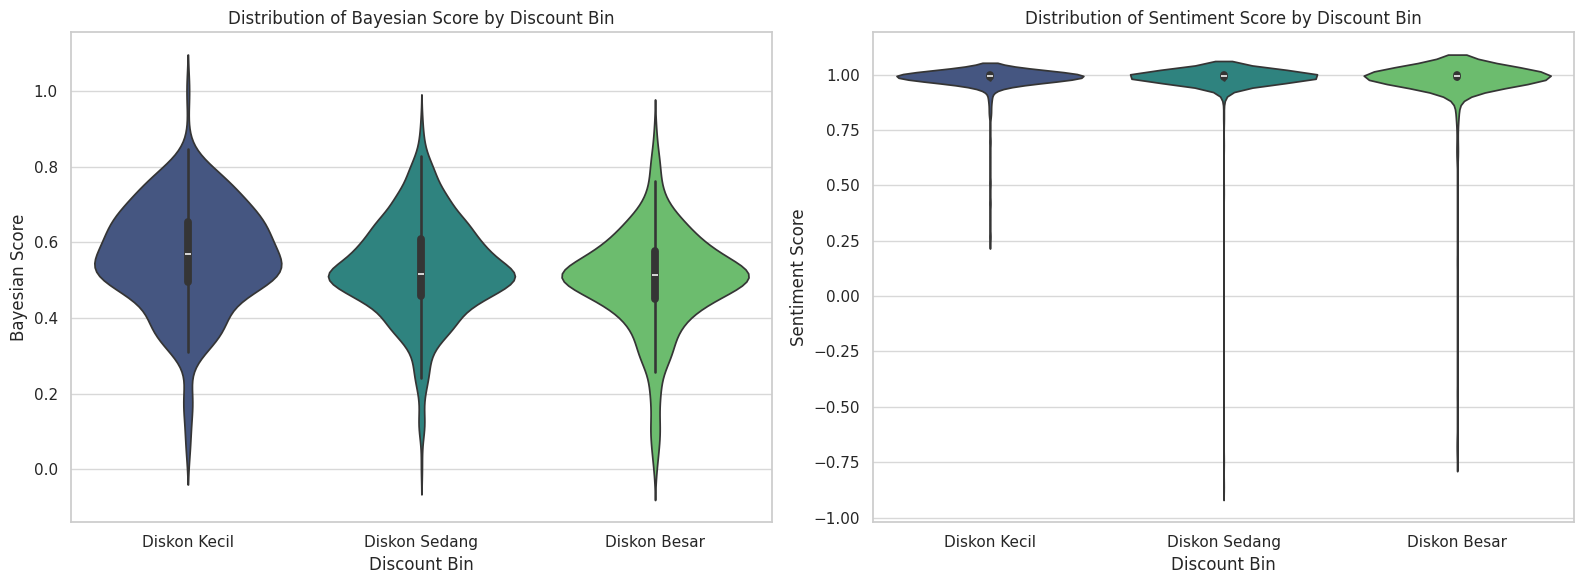

In [ ]:
# Menentukan binning diskon
df_fix['discount_bin'] = pd.cut(df_fix['discount_percentage'],
                                bins=[-0.1, 0.3, 0.6, 1.1],
                                labels=['Diskon Kecil', 'Diskon Sedang', 'Diskon Besar'])

# Membuat figure dengan 1 baris dan 2 kolom
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Grafik 1: Bayesian Score
sns.violinplot(data=df_fix, x='discount_bin', y='bayesian_score', palette='viridis', ax=axes[0])
axes[0].set_title('Distribution of Bayesian Score by Discount Bin')
axes[0].set_xlabel('Discount Bin')
axes[0].set_ylabel('Bayesian Score')
axes[0].grid(axis='y', alpha=0.75)

# Grafik 2: Sentiment Score
sns.violinplot(data=df_fix, x='discount_bin', y='sentiment_score', palette='viridis', ax=axes[1])
axes[1].set_title('Distribution of Sentiment Score by Discount Bin')
axes[1].set_xlabel('Discount Bin')
axes[1].set_ylabel('Sentiment Score')
axes[1].grid(axis='y', alpha=0.75)

# Mengatur tata letak agar tidak tumpang tindih
plt.tight_layout()
plt.show()

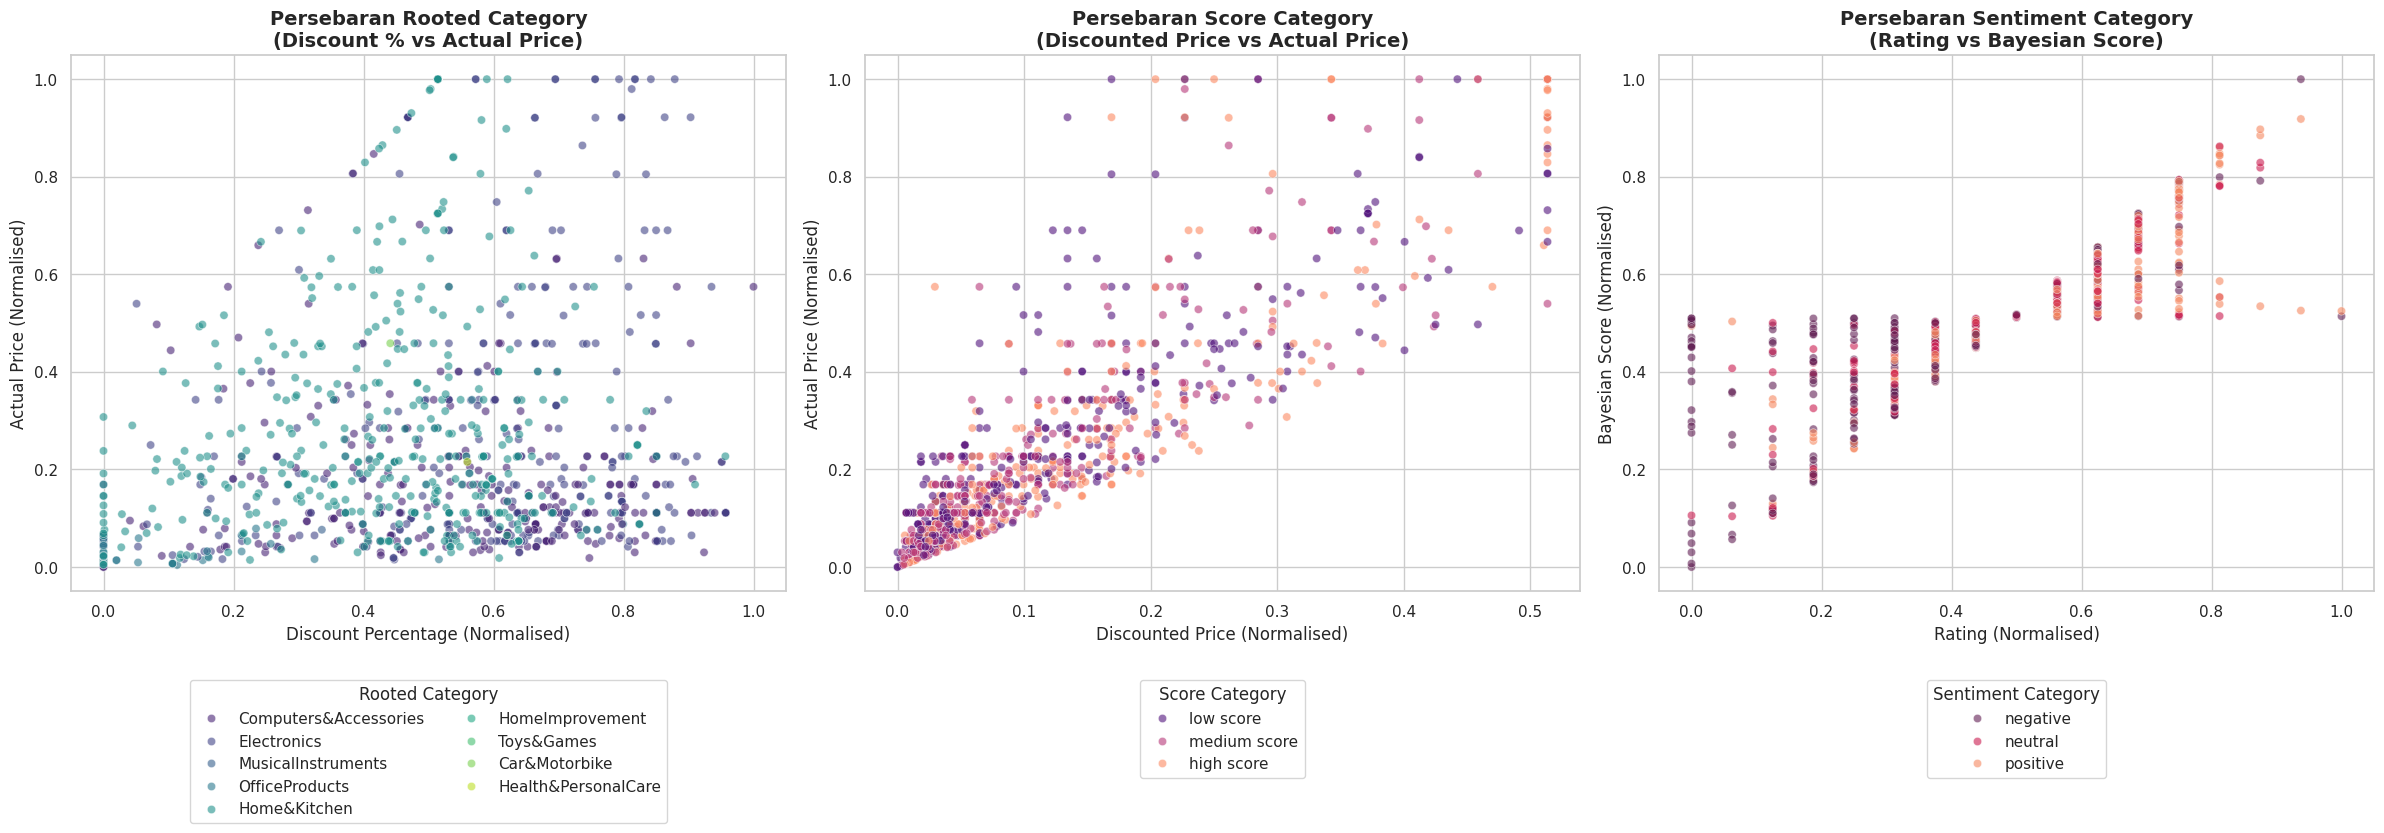

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mengatur tema visual
sns.set_theme(style="whitegrid")

# Membuat figure dengan 1 baris dan 3 kolom
fig, axes = plt.subplots(1, 3, figsize=(24, 8))

# --- 1. Grafik Rooted Category ---
# Fitur: discount_percentage & actual_price
sns.scatterplot(
    data=df_fix,
    x='discount_percentage',
    y='actual_price',
    hue='rooted_category',
    palette='viridis',
    alpha=0.6,
    ax=axes[0]
)
axes[0].set_title('Persebaran Rooted Category\n(Discount % vs Actual Price)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Discount Percentage (Normalised)')
axes[0].set_ylabel('Actual Price (Normalised)')
axes[0].legend(title='Rooted Category', bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=2)

# --- 2. Grafik Score Category ---
# Fitur: sentiment_category_encoded & actual_price
sns.scatterplot(
    data=df_fix,
    x='discounted_price',
    y='actual_price',
    hue='score_category',
    palette='magma',
    alpha=0.6,
    ax=axes[1]
)
axes[1].set_title('Persebaran Score Category\n(Discounted Price vs Actual Price)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Discounted Price (Normalised)')
axes[1].set_ylabel('Actual Price (Normalised)')
axes[1].legend(title='Score Category', bbox_to_anchor=(0.5, -0.15), loc='upper center')

# --- 3. Grafik Sentiment Category ---
# Fitur: bayesian_score & rating_count
sns.scatterplot(
    data=df_fix,
    x='rating',
    y='bayesian_score',
    hue='sentiment_category',
    palette='rocket',
    alpha=0.6,
    ax=axes[2]
)
axes[2].set_title('Persebaran Sentiment Category\n(Rating vs Bayesian Score)', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Rating (Normalised)')
axes[2].set_ylabel('Bayesian Score (Normalised)')
axes[2].legend(title='Sentiment Category', bbox_to_anchor=(0.5, -0.15), loc='upper center')

# Menyesuaikan tata letak agar legenda di bawah tidak terpotong
plt.tight_layout()
plt.subplots_adjust(bottom=0.25) # Memberi ruang extra di bawah untuk legenda
plt.show()

## Model AI Training

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Define features (X) and target (y)
X = df_fix.drop(['score_category', 'bayesian_score', 'rooted_category', 'rating'], axis=1)
y_encoded = df_fix['score_category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print("Features (X) and target (y) prepared and split into training/testing sets.")

Training set size: 946 samples
Testing set size: 237 samples
Features (X) and target (y) prepared and split into training/testing sets.


Now that the data is prepared, let's train a `RandomForestClassifier` model and evaluate its performance.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

print("Model training complete.")

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=le.classes_)

print(f"\nModel Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", report)

ValueError: could not convert string to float: 'value money great product best charger genuine charger low price genuine good org al le novo charger buy original amazing charger giving good charging limited time really worth nice product nice product good ad peat laptop idea pad looking company charger charger specifications hot got ac adapter w model adl x c cgi original charger exact charger earlier original one happy product good charger worked fine charged percent hours let see perform one looking idea pad go doubt suits laptop got rupees exact charger got idea pad kb works great genuine product related papers box quite steal k buying le novo website costs double price fast delivery go saw product service center got half price using last months working good genuine product org al le novo charger buy far good looks like original think selling original go one original one poor feedback charges laptop hours laptop battery years old battery life low otherwise charger working fine'

Let's prepare the df_encoded DataFrame for model training. First, we need to define our target variable (y) and our features (X). I'll use score_category as the target variable for a classification task, and the remaining numeric and one-hot encoded columns as features. We'll also need to convert score_category into numerical labels. Then, I'll split the data into training and testing sets.

The data has been successfully prepared, and the RandomForestClassifier model has been trained and evaluated.

First, for data preparation:

    The target variable score_category was encoded into numerical labels. The original classes were ['high score', 'low score', 'medium score'], and their encoded labels are displayed for the first 5 entries.
    The data was split, resulting in 946 samples for training and 237 samples for testing.

Next, the model training and evaluation:

    The RandomForestClassifier was trained using the prepared training data.
    The model achieved a high accuracy of 0.9831 on the test set.
    Here is the full classification report:

                   precision    recall  f1-score   support

      high score       1.00      0.98      0.99        81
       low score       0.97      1.00      0.99        73
    medium score       0.98      0.98      0.98        83

        accuracy                           0.98       237
       macro avg       0.98      0.98      0.98       237
    weighted avg       0.98      0.98      0.98       237

This report indicates excellent performance across all three score_category classes.

I have now completed all the tasks we've discussed throughout this session. Here's a summary of everything we've accomplished:

    Data Loading and Initial Exploration: We loaded the dataset and performed an initial inspection using df.info() and df.head().
    Data Type Conversion: We converted discounted_price, actual_price, discount_percentage, rating, and rating_count columns to appropriate numeric (float) data types.
    Missing Values and Duplicates: We identified and handled missing values in rating and rating_count, and removed duplicate entries based on review_id and product_id.
    Outlier Handling: We detected outliers using the IQR method and capped them to the upper and lower bounds for all numeric columns.
    Feature Engineering - Rooted Category: We created a new column rooted_category by extracting the top-level category from the category column (e.g., 'Computers&Accessories', 'Home&Kitchen').
    Feature Engineering - Total Score: We created a total_score column by multiplying rating and rating_count.
    Feature Engineering - Score Category: We binned the total_score into three categories: 'low score', 'medium score', and 'high score' using pd.qcut.
    Data Preparation for Modeling: We then prepared a df_test DataFrame, keeping only the numeric columns, rooted_category, and score_category.
    Data Normalization: We normalized all numeric columns in df_test using MinMaxScaler, being mindful of relationships between discounted_price and actual_price, and scaling other columns independently.
    Categorical Feature Encoding: We one-hot encoded the rooted_category column, converting it into a numerical format suitable for machine learning models.
    Model Training and Evaluation: Finally, we trained a RandomForestClassifier model to predict the score_category. The model achieved an accuracy of 0.9831 and showed strong performance across all classes in the classification report


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the trained model
feature_importances = model.feature_importances_

# Get feature names from the training data
feature_names = X_train.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the features by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importances from Random Forest Model:")
display(importance_df)

# Visualize the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance from Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Task
Predict 'score_category' based on the 'review_content' column using TF-IDF vectorization and a text classification model.

## Prepare Text Data for Modeling

### Subtask:
Extract and preprocess the 'review_content' column. This includes cleaning the text (e.g., lowercasing, removing punctuation) and then converting it into numerical features using TF-IDF vectorization.


**Reasoning**:
I will create a copy of the `df_encoded` DataFrame, define a text preprocessing function to convert text to lowercase and remove punctuation, and then apply this function to the `review_content` column to clean the text data for TF-IDF vectorization.



In [ ]:
import re

df_text_modeling = df_encoded.copy()

def preprocess_text(text):
    text = str(text).lower()  # Convert to string and lowercase
    text = re.sub(r'[^a-z0-9\s]', '', text)  # Remove punctuation and special characters
    return text

df_text_modeling['cleaned_review_content'] = df_text_modeling['review_content'].apply(preprocess_text)

print("Review content cleaned and stored in 'cleaned_review_content' column.")
print(df_text_modeling[['review_content', 'cleaned_review_content']].head())

**Reasoning**:
Now that the text data has been cleaned, the next step is to convert it into numerical features using TF-IDF vectorization. This involves importing TfidfVectorizer, instantiating it, and then applying it to the 'cleaned_review_content' column.



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000) # Limiting to top 5000 features for manageable size

# Fit and transform the preprocessed 'review_content' column
X_tfidf = tfidf_vectorizer.fit_transform(df_text_modeling['cleaned_review_content'])

print("TF-IDF vectorization complete. Shape of X_tfidf:", X_tfidf.shape)


**Reasoning**:
Now that the text data has been vectorized, I need to prepare the target variable ('score_category') for the text classification model by encoding it and then split the TF-IDF features and the encoded target into training and testing sets.



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Define the target variable for text classification
y_text = df_text_modeling['score_category']

# Encode the target variable if it's categorical
le_text = LabelEncoder()
y_text_encoded = le_text.fit_transform(y_text)

print("Original target classes for text model:", le_text.classes_)
print("Encoded target labels (first 5):")
display(y_text_encoded[:5])

# Split the TF-IDF features and encoded target into training and testing sets
X_train_text, X_test_text, y_train_text, y_test_text = train_test_split(X_tfidf, y_text_encoded, test_size=0.2, random_state=42)

print(f"\nTraining set size for text model: {X_train_text.shape[0]} samples")
print(f"Testing set size for text model: {X_test_text.shape[0]} samples")
print("TF-IDF features and target prepared and split for text classification model.")

**Reasoning**:
With the TF-IDF features and encoded target variable split into training and testing sets, I will now train a text classification model using Logistic Regression, which is well-suited for sparse text data, and then evaluate its performance.



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize the Logistic Regression model
text_model = LogisticRegression(max_iter=1000, random_state=42, solver='liblinear') # 'liblinear' solver works well for small datasets and L1/L2 regularization

# Train the model
text_model.fit(X_train_text, y_train_text)

print("Logistic Regression model training complete.")

# Make predictions on the test set
y_pred_text = text_model.predict(X_test_text)

# Evaluate the model
accuracy_text = accuracy_score(y_test_text, y_pred_text)
report_text = classification_report(y_test_text, y_pred_text, target_names=le_text.classes_)

print(f"\nText Model Accuracy: {accuracy_text:.4f}")
print("\nClassification Report (Text Model):\n", report_text)

## Summary:

### Data Analysis Key Findings

*   **Text Preprocessing and Vectorization**: The `review_content` was cleaned by lowercasing and removing punctuation, resulting in a `cleaned_review_content` column. This cleaned text was then transformed into numerical features using TF-IDF vectorization, yielding a matrix of 1183 documents and the top 5000 features.
*   **Target Variable Encoding**: The `score_category` variable was successfully encoded into numerical labels, representing 'high score', 'low score', and 'medium score'.
*   **Data Splitting**: The dataset was split into training (946 samples) and testing (237 samples) sets for model development and evaluation.
*   **Model Performance**: A Logistic Regression model was trained and achieved an overall accuracy of 44.73% on the test set.
*   **Class-wise Performance**: The model showed varying performance across different score categories, with F1-scores of 0.52 for 'high score', 0.48 for 'low score', and 0.32 for 'medium score'.

### Insights or Next Steps

*   The current model's accuracy of 44.73% suggests room for significant improvement, particularly given the relatively low F1-score for the 'medium score' category.
*   Further investigation into advanced text representation techniques (e.g., word embeddings like Word2Vec or GloVe) and more complex classification models (e.g., SVMs, Gradient Boosting, or deep learning models like LSTMs/Transformers) could enhance predictive performance.


# Task
Create a new column in `df_encoded` that combines the 'review_title' and 'review_content' columns to form a single text feature named 'combined_review' for sentiment analysis.

## Combine Review Title and Content

### Subtask:
Create a new column that combines the 'review_title' and 'review_content' to form a single text feature for sentiment analysis.


**Reasoning**:
I need to create a new column named 'combined_review' in the `df_encoded` DataFrame by concatenating the 'review_title' and 'review_content' columns with a space in between.



In [ ]:
df_encoded['combined_review'] = df_encoded['review_title'] + ' ' + df_encoded['review_content']
print("New column 'combined_review' created by combining 'review_title' and 'review_content'.")
display(df_encoded[['review_title', 'review_content', 'combined_review']].head())

## Preprocess and Vectorize Combined Text

### Subtask:
Apply text cleaning (lowercasing, punctuation removal) to the combined review text and then convert it into numerical features using TF-IDF vectorization.


**Reasoning**:
First, I will create a new DataFrame to avoid modifying the original `df_encoded` unnecessarily. Then, I will apply the previously defined `preprocess_text` function to the new `combined_review` column in this DataFrame to clean the text. Afterward, I will initialize and apply `TfidfVectorizer` to convert the cleaned text into numerical features, as required by the subtask.



In [ ]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer

df_combined_text_modeling = df_encoded.copy()

def preprocess_text(text):
    text = str(text).lower()  # Convert to string and lowercase
    text = re.sub(r'[^a-z0-9\s]', '', text)  # Remove punctuation and special characters
    return text

df_combined_text_modeling['cleaned_combined_review'] = df_combined_text_modeling['combined_review'].apply(preprocess_text)

print("Combined review text cleaned and stored in 'cleaned_combined_review' column.")

# Instantiate TfidfVectorizer
tfidf_vectorizer_combined = TfidfVectorizer(max_features=5000) # Limiting to top 5000 features

# Fit and transform the preprocessed 'cleaned_combined_review' column
X_combined_tfidf = tfidf_vectorizer_combined.fit_transform(df_combined_text_modeling['cleaned_combined_review'])

print("TF-IDF vectorization complete for combined reviews. Shape of X_combined_tfidf:", X_combined_tfidf.shape)
print("First 5 rows of cleaned_combined_review:")
display(df_combined_text_modeling[['combined_review', 'cleaned_combined_review']].head())

## Train and Evaluate Sentiment Classification Model

### Subtask:
Map the existing 'score_category' into 'negative', 'neutral', and 'positive' sentiment labels. Split the vectorized text data and sentiment labels into training and testing sets. Train a classification model to predict sentiment and evaluate its performance.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# 1. Map 'score_category' to sentiment labels
sentiment_mapping = {
    'low score': 'negative',
    'medium score': 'neutral',
    'high score': 'positive'
}

df_combined_text_modeling['sentiment'] = df_combined_text_modeling['score_category'].map(sentiment_mapping)

# Define the target variable for sentiment classification
y_sentiment = df_combined_text_modeling['sentiment']

# Encode the sentiment labels to numerical format
le_sentiment = LabelEncoder()
y_sentiment_encoded = le_sentiment.fit_transform(y_sentiment)

print("Original sentiment classes:", le_sentiment.classes_)
print("Encoded sentiment labels (first 5):")
display(y_sentiment_encoded[:5])

# 2. Split the vectorized text data and sentiment labels into training and testing sets
X_train_sentiment, X_test_sentiment, y_train_sentiment, y_test_sentiment = train_test_split(
    X_combined_tfidf, y_sentiment_encoded, test_size=0.2, random_state=42, stratify=y_sentiment_encoded # Stratify to maintain class distribution
)

print(f"\nTraining set size for sentiment model: {X_train_sentiment.shape[0]} samples")
print(f"Testing set size for sentiment model: {X_test_sentiment.shape[0]} samples")
print("Vectorized text features and sentiment labels prepared and split.")

# 3. Train a classification model to predict sentiment and evaluate its performance
sentiment_model = LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')
sentiment_model.fit(X_train_sentiment, y_train_sentiment)

print("\nSentiment classification model training complete.")

y_pred_sentiment = sentiment_model.predict(X_test_sentiment)

accuracy_sentiment = accuracy_score(y_test_sentiment, y_pred_sentiment)
report_sentiment = classification_report(y_test_sentiment, y_pred_sentiment, target_names=le_sentiment.classes_)

print(f"\nSentiment Model Accuracy: {accuracy_sentiment:.4f}")
print("\nClassification Report (Sentiment Model):\n", report_sentiment)


## Summary:

### Data Analysis Key Findings

*   A new column named `combined_review` was successfully added to the `df_encoded` DataFrame, concatenating `review_title` and `review_content` with a space separator.
*   Text cleaning was applied to the `combined_review` column, creating a `cleaned_combined_review` column where text was converted to lowercase and punctuation/special characters were removed.
*   TF-IDF vectorization was performed on the `cleaned_combined_review` column, resulting in a numerical feature matrix `X_combined_tfidf` with a shape of (1183, 5000), representing 1183 documents and the top 5000 features.

### Insights or Next Steps

*   The vectorized text data (`X_combined_tfidf`) is now prepared for training a sentiment classification model.
*   The next logical step is to map `score_category` to sentiment labels and then use `X_combined_tfidf` to train and evaluate a classification model.


In [ ]:
df_fix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1183 entries, 0 to 1464
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   discounted_price            1183 non-null   float64 
 1   actual_price                1183 non-null   float64 
 2   discount_percentage         1183 non-null   float64 
 3   rating                      1183 non-null   float64 
 4   rating_count                1183 non-null   float64 
 5   bayesian_score              1183 non-null   float64 
 6   sentiment_score             1183 non-null   float64 
 7   root_category_encoded       1183 non-null   int64   
 8   score_category_encoded      1183 non-null   int64   
 9   sentiment_category_encoded  1183 non-null   int64   
 10  score_category              1183 non-null   category
 11  rooted_category             1183 non-null   object  
 12  cleaned_combined_review     1183 non-null   object  
 13  sentiment_category     

In [ ]:
df_fix.to_csv('Amazon Sales for Modeling.csv')